# Experimento de Franck-hertz

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [8]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 120

Dados

In [9]:
Vr = 1.55

In [10]:
data = {}

for file in os.listdir('dados'):
	if file not in ['checkpoints', '.ipynb_checkpoints']:
		T = file.split('_')[1]

		T = int(T)

		if T not in data: data[T] = {}

		load_data = np.loadtxt(f'dados/{file}').transpose()
		data[T]['Tensão (V)'] = load_data[0]
		data[T]['Corrente (A)'] = load_data[1]
		data[T]['Temperatura (°C)'] = load_data[2]

		data[T] = pd.DataFrame(data[T])

## Curvas de corrente

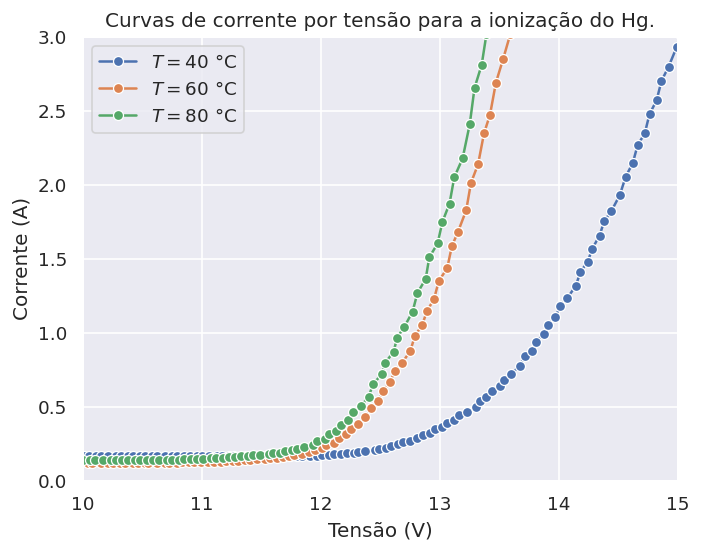

In [33]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

for T in [ 40, 60, 80 ]: sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='o')

plt.xlim(10, 15)
plt.ylim(0, 3)

plt.savefig('plots/current_curves_cut.png', dpi=300, bbox_inches='tight')
plt.show()

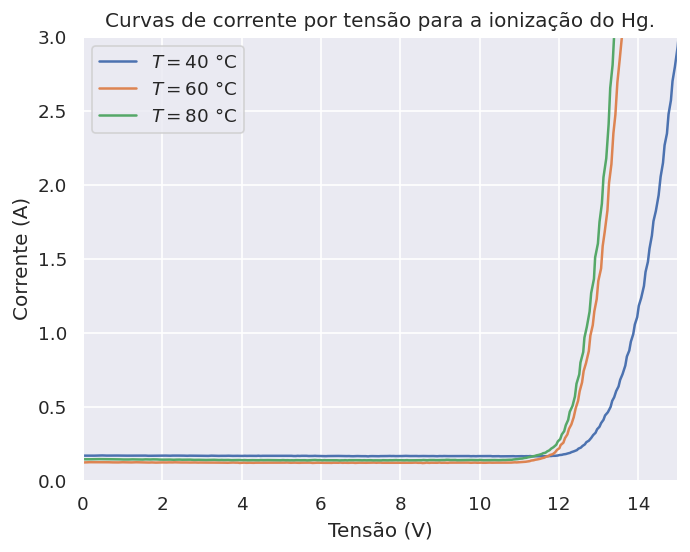

In [32]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

for T in [ 40, 60, 80 ]: sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C')

plt.xlim(0, 15)
plt.ylim(0, 3)

plt.savefig('plots/current_curves_full.png', dpi=300, bbox_inches='tight')
plt.show()

## Determinação do potencial de ionização

### 40°C

In [130]:
T = 40
df = data[T]

In [131]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [132]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

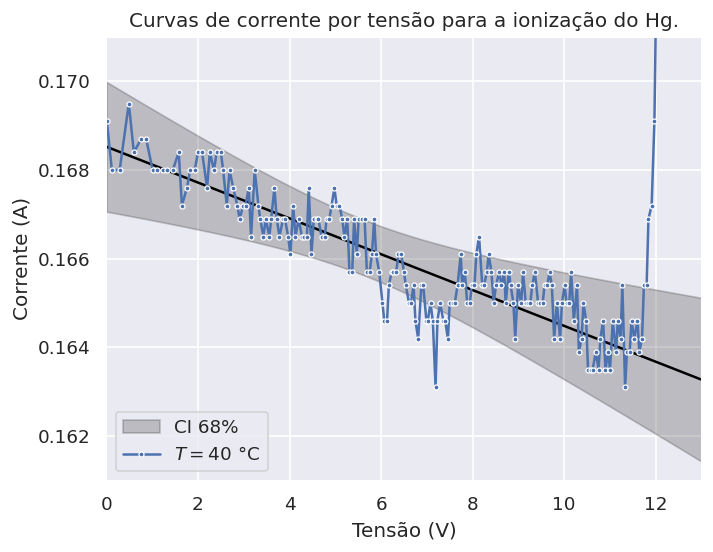

In [133]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')

plt.xlim(0, 13)
plt.ylim(0.161, 0.171)
#plt.savefig('plots/current_curves_full.png', dpi=300, bbox_inches='tight')
plt.show()

### 60 °C

In [134]:
T = 60
df = data[T]

In [135]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [136]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

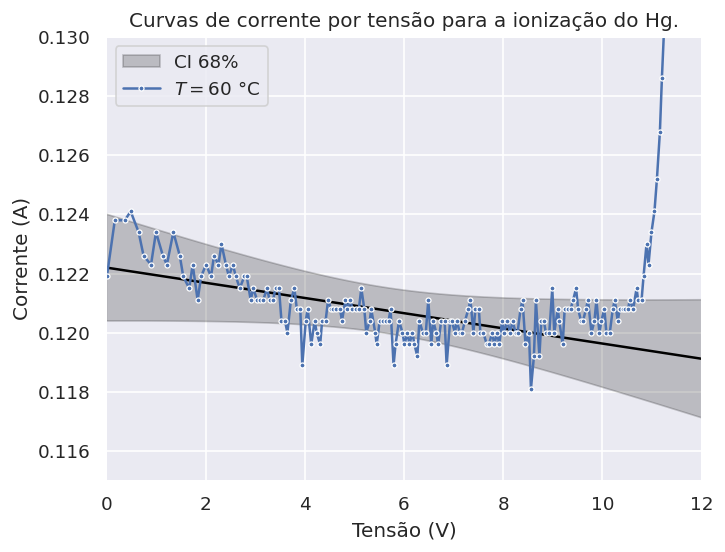

In [137]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')

plt.xlim(0, 12)
plt.ylim(0.115, 0.13)
#plt.savefig('plots/current_curves_full.png', dpi=300, bbox_inches='tight')
plt.show()

### 80 °C

In [148]:
T = 80
df = data[T]

In [149]:
df_fit = df.loc[ (df['Tensão (V)'] > 0) & (df['Tensão (V)'] <= 10) ]

xdata = np.array(df_fit['Tensão (V)'])
ydata = np.array(-df_fit['Corrente (A)'])

In [150]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=xdata,
    ydata=ydata,
    p0=[ -0.0005, 0.169 ]
)

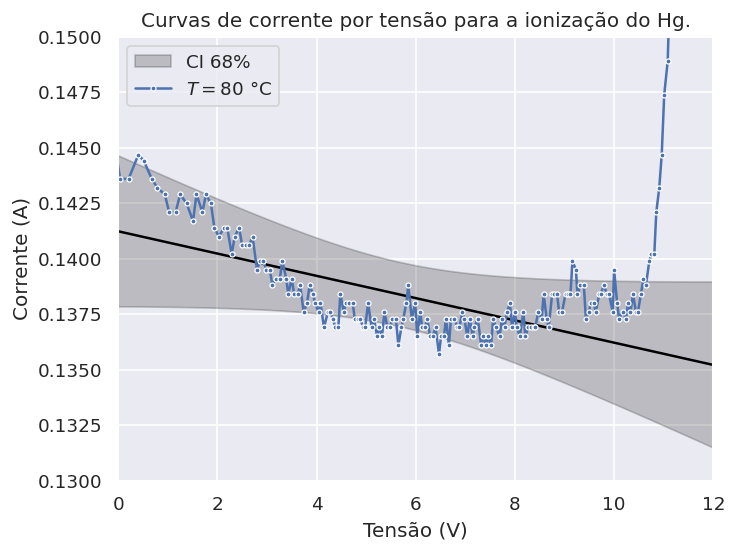

In [151]:
plt.title('Curvas de corrente por tensão para a ionização do Hg.')

x = np.linspace(0, 15, 1000)
y = popt[0] * x + popt[1]

# Cálculo do intervalo de confiança
S_xy    = np.sqrt( np.mean(( ydata - popt[0] * xdata - popt[1] )**2) )
S_xx    = np.std(xdata)**2
t_crit  = 1

delta = t_crit * S_xy * np.sqrt(1 + 1 / len(xdata) + (x - np.mean(xdata))**2 / S_xx )

plt.fill_between(x=x, y1=y + delta, y2=y - delta, color='black', alpha=0.2, label='CI 68%')
sns.lineplot(x=x, y=y, color='black')
sns.lineplot(x=data[T]['Tensão (V)'], y=-data[T]['Corrente (A)'], label=f'$T={T}$ °C', marker='.')

plt.xlim(0, 12)
plt.ylim(0.13, 0.15)
#plt.savefig('plots/current_curves_full.png', dpi=300, bbox_inches='tight')
plt.show()